### **Multi-Layer Perceptron (MLP)**

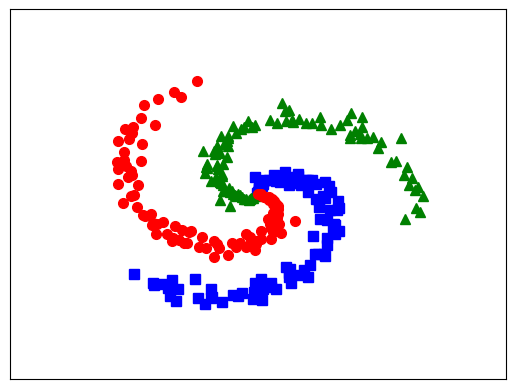

In [ ]:
# Hỗ trợ cả Python 2 và Python 3
from __future__ import division, print_function, unicode_literals
import math
import numpy as np
import matplotlib.pyplot as plt

N = 100  # số điểm cho mỗi lớp
d0 = 2   # số chiều của dữ liệu
C = 3    # số lớp
X = np.zeros((d0, N*C))  # ma trận dữ liệu (mỗi cột là một điểm dữ liệu)
y = np.zeros(N*C, dtype='uint8')  # nhãn của các lớp

# Thay xrange bằng range để tương thích với Python 3
for j in range(C):
    ix = range(N*j, N*(j+1))
    r = np.linspace(0.0, 1, N)  # bán kính
    t = np.linspace(j*4, (j+1)*4, N) + np.random.randn(N)*0.2  # góc theta
    X[:,ix] = np.c_[r*np.sin(t), r*np.cos(t)].T
    y[ix] = j

# Vẽ dữ liệu:
# plt.scatter(X[:N, 0], X[:N, 1], c=y[:N], s=40, cmap=plt.cm.Spectral)

# Vẽ điểm dữ liệu cho từng lớp
plt.plot(X[0, :N], X[1, :N], 'bs', markersize = 7)        # Lớp 1: hình vuông màu xanh
plt.plot(X[0, N:2*N], X[1, N:2*N], 'g^', markersize = 7)  # Lớp 2: tam giác màu xanh lá
plt.plot(X[0, 2*N:], X[1, 2*N:], 'ro', markersize = 7)    # Lớp 3: hình tròn màu đỏ

# Thiết lập giới hạn trục
plt.xlim([-1.5, 1.5])
plt.ylim([-1.5, 1.5])

# Ẩn các điểm đánh dấu trên trục
cur_axes = plt.gca()  # lấy trục hiện tại
cur_axes.axes.get_xaxis().set_ticks([])  # ẩn điểm đánh dấu trục x
cur_axes.axes.get_yaxis().set_ticks([])  # ẩn điểm đánh dấu trục y

# Lưu và hiển thị hình
plt.savefig('EX.png', bbox_inches='tight', dpi = 600)  # lưu hình với độ phân giải cao
plt.show()  # hiển thị hình

In [ ]:
def softmax(V):
    e_V = np.exp(V - np.max(V, axis = 0, keepdims = True))
    Z = e_V / e_V.sum(axis = 0)
    return Z

## One-hot coding
from scipy import sparse
def convert_labels(y, C = 3):
    Y = sparse.coo_matrix((np.ones_like(y),
        (y, np.arange(len(y)))), shape = (C, len(y))).toarray()
    return Y

# cost or loss function
def cost(Y, Yhat):
    return -np.sum(Y*np.log(Yhat))/Y.shape[1]

iter 0, loss: 1.098417
iter 1000, loss: 0.124155
iter 2000, loss: 0.052241
iter 3000, loss: 0.036310
iter 4000, loss: 0.029967
iter 5000, loss: 0.026371
iter 6000, loss: 0.023981
iter 7000, loss: 0.022267
iter 8000, loss: 0.021031
iter 9000, loss: 0.020074
training accuracy: 99.33 %


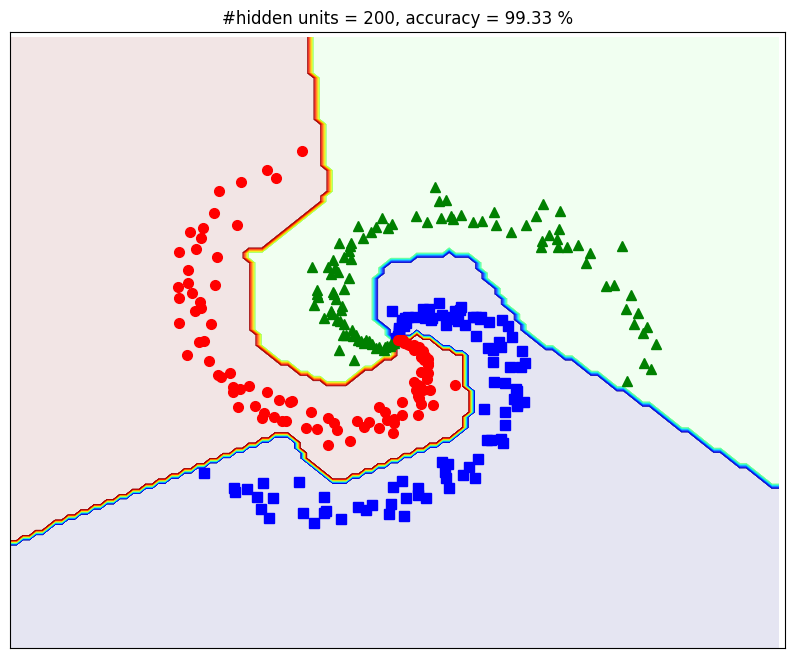

In [ ]:
d0 = 2
d1 = h = 200  # size of hidden layer
d2 = C = 3

# Khởi tạo tham số
W1 = 0.01*np.random.randn(d0, d1)
b1 = np.zeros((d1, 1))
W2 = 0.01*np.random.randn(d1, d2)
b2 = np.zeros((d2, 1))

# Chuyển đổi labels sang one-hot encoding
Y = convert_labels(y, C)
N = X.shape[1]
eta = 1  # learning rate

# Training loop
for i in range(10000):  # Thay xrange bằng range cho Python 3
    # Feedforward
    Z1 = np.dot(W1.T, X) + b1
    A1 = np.maximum(Z1, 0)  # ReLU activation
    Z2 = np.dot(W2.T, A1) + b2
    Yhat = softmax(Z2)

    # Tính loss
    loss = cost(Y, Yhat)

    if i % 1000 == 0:
        print("iter %d, loss: %f" %(i, loss))

    # Backpropagation
    E2 = (Yhat - Y)/N
    dW2 = np.dot(A1, E2.T)
    db2 = np.sum(E2, axis=1, keepdims=True)
    E1 = np.dot(W2, E2)
    E1[Z1 <= 0] = 0  # ReLU gradient
    dW1 = np.dot(X, E1.T)
    db1 = np.sum(E1, axis=1, keepdims=True)

    # Gradient Descent update
    W1 += -eta*dW1
    b1 += -eta*db1
    W2 += -eta*dW2
    b2 += -eta*db2

# Predict và tính accuracy
Z1 = np.dot(W1.T, X) + b1
A1 = np.maximum(Z1, 0)
Z2 = np.dot(W2.T, A1) + b2
predicted_class = np.argmax(Z2, axis=0)
acc = 100*np.mean(predicted_class == y)
print('training accuracy: %.2f %%' % acc)

# Visualize kết quả
xm = np.arange(-1.5, 1.5, 0.025)
ym = np.arange(-1.5, 1.5, 0.025)
xx, yy = np.meshgrid(xm, ym)

# Reshape data để predict
xx1 = xx.ravel().reshape(1, xx.size)
yy1 = yy.ravel().reshape(1, yy.size)
X0 = np.vstack((xx1, yy1))

# Predict cho visualization
Z1 = np.dot(W1.T, X0) + b1
A1 = np.maximum(Z1, 0)
Z2 = np.dot(W2.T, A1) + b2
Z = np.argmax(Z2, axis=0)
Z = Z.reshape(xx.shape)

# Vẽ contour plot
plt.figure(figsize=(10, 8))
CS = plt.contourf(xx, yy, Z, 200, cmap='jet', alpha=0.1)

# Vẽ training points
N = 100
plt.plot(X[0, :N], X[1, :N], 'bs', markersize=7)
plt.plot(X[0, N:2*N], X[1, N:2*N], 'g^', markersize=7)
plt.plot(X[0, 2*N:], X[1, 2*N:], 'ro', markersize=7)

# Thiết lập các thông số đồ thị
plt.xlim(-1.5, 1.5)
plt.ylim(-1.5, 1.5)
plt.xticks([])
plt.yticks([])
plt.title('#hidden units = %d, accuracy = %.2f %%' %(d1, acc))

plt.show()

Mạng MLP được sử dụng để giải quyết bài toán XOR
z₀⁽¹⁾ = (-2 × 1) + (2 × 0) + 3   [nhân W⁽¹⁾ hàng 1 với x và cộng b⁽¹⁾[0]]
      = -2 + 0 + 3
      = 1
a₀⁽¹⁾ = sgn(1) = 1              [áp dụng hàm kích hoạt]

z₁⁽¹⁾ = (-2 × 1) + (2 × 0) + (-1) [nhân W⁽¹⁾ hàng 2 với x và cộng b⁽¹⁾[1]]
      = -2 + 0 + (-1)
      = -3
a₁⁽¹⁾ = sgn(-3) = -1            [áp dụng hàm kích hoạt]

z⁽²⁾ = (1 × 1) + (1 × (-1)) + (-1) [nhân W⁽²⁾ với [a₀⁽¹⁾, a₁⁽¹⁾] và cộng b⁽²⁾]
     = 1 + (-1) + (-1)
     = -1
a⁽²⁾ = sgn(-1) = -1              [áp dụng hàm kích hoạt]

Kết quả dự đoán:
----------------------------------------
Đầu vào: [0 0]
Giá trị lớp ẩn: [ 1 -1]
Dự đoán: [-1]
Giá trị thực: -1
----------------------------------------
Đầu vào: [0 1]
Giá trị lớp ẩn: [1 1]
Dự đoán: [1]
Giá trị thực: 1
----------------------------------------
Đầu vào: [1 0]
Giá trị lớp ẩn: [ 1 -1]
Dự đoán: [-1]
Giá trị thực: 1
----------------------------------------
Đầu vào: [1 1]
Giá trị lớp ẩn: [ 1 -1]
Dự đoán: [-1]
Giá trị thực: -1
----------------------------------------


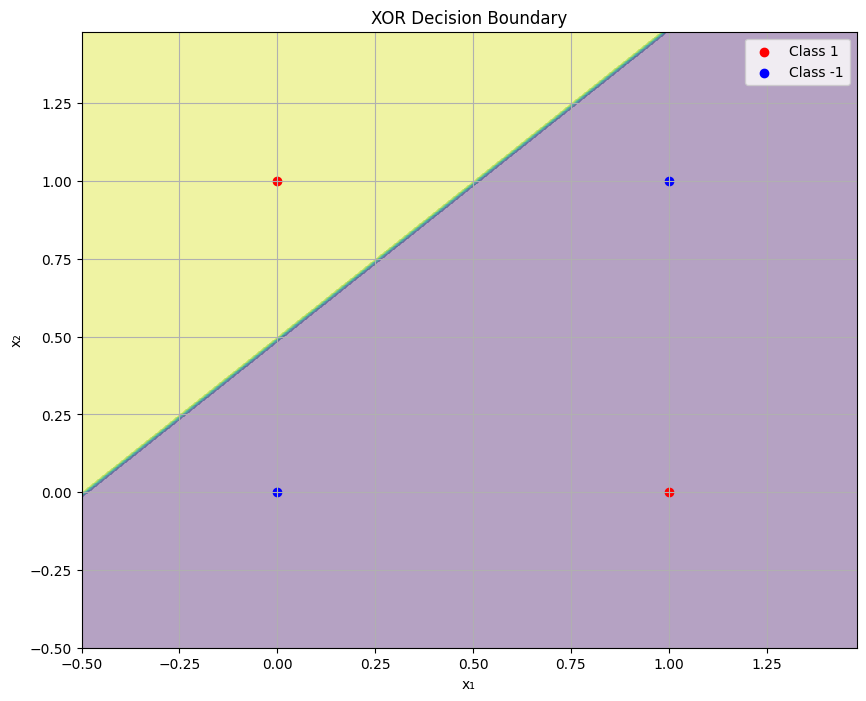

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

# Định nghĩa hàm sign
def sign(x):
    return np.where(x >= 0, 1, -1)

# Tạo dữ liệu XOR
X = np.array([[0, 0], [0, 1], [1, 0], [1, 1]])
y = np.array([-1, 1, 1, -1])  # Sử dụng -1 và 1 thay vì 0 và 1

# Khởi tạo tham số mạng theo đề bài
W1 = np.array([[-2, 2], [-2, 2]])
b1 = np.array([3, -1])
W2 = np.array([1, 1])
b2 = np.array([-1])

# Tính forward pass
def forward(x, W1, b1, W2, b2):
    # Lớp ẩn
    z1 = np.dot(x, W1.T) + b1
    a1 = sign(z1)

    # Lớp đầu ra
    z2 = np.dot(a1, W2.T) + b2
    output = sign(z2)

    return a1, output

# Vẽ đường biên quyết định
def plot_decision_boundary():
    # Tạo lưới điểm để vẽ
    x1_min, x1_max = -0.5, 1.5
    x2_min, x2_max = -0.5, 1.5
    xx1, xx2 = np.meshgrid(np.arange(x1_min, x1_max, 0.02),
                          np.arange(x2_min, x2_max, 0.02))

    # Dự đoán cho mỗi điểm trong lưới
    grid = np.c_[xx1.ravel(), xx2.ravel()]
    predictions = np.array([forward(x, W1, b1, W2, b2)[1] for x in grid])
    predictions = predictions.reshape(xx1.shape)

    # Vẽ đường biên quyết định
    plt.figure(figsize=(10, 8))
    plt.contourf(xx1, xx2, predictions, alpha=0.4)
    plt.scatter(X[y == 1][:, 0], X[y == 1][:, 1], c='red', label='Class 1')
    plt.scatter(X[y == -1][:, 0], X[y == -1][:, 1], c='blue', label='Class -1')
    plt.xlabel('x₁')
    plt.ylabel('x₂')
    plt.title('XOR Decision Boundary')
    plt.legend()
    plt.grid(True)
    plt.show()

# Kiểm tra kết quả cho tất cả các điểm
print("Kết quả dự đoán:")
print("-" * 40)
for i, x in enumerate(X):
    a1, pred = forward(x, W1, b1, W2, b2)
    print(f"Đầu vào: {x}")
    print(f"Giá trị lớp ẩn: {a1}")
    print(f"Dự đoán: {pred}")
    print(f"Giá trị thực: {y[i]}")
    print("-" * 40)

# Vẽ đường biên quyết định
plot_decision_boundary()

### **Histogram of Oriented Gradients (HOG)**

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from skimage.feature import hog
from skimage import exposure
import cv2
# Để hiển thị ảnh trong Colab
from IPython.display import Image, display

Quy trình

HOG features shape: (1, 36)
HOG features: [[0.20235781 0.05475783 0.05953241 0.24852991 0.15494776 0.01418005
  0.02058018 0.02818744 0.09577286 0.25295005 0.02619634 0.08430834
  0.06935371 0.17457912 0.10883705 0.20080912 0.46596861 0.2423043
  0.09272874 0.01383946 0.06415278 0.06705748 0.09146573 0.48938181
  0.10546207 0.0848227  0.         0.0546602  0.00583968 0.0325989
  0.13801073 0.22615414 0.22947087 0.08256156 0.06113169 0.        ]]


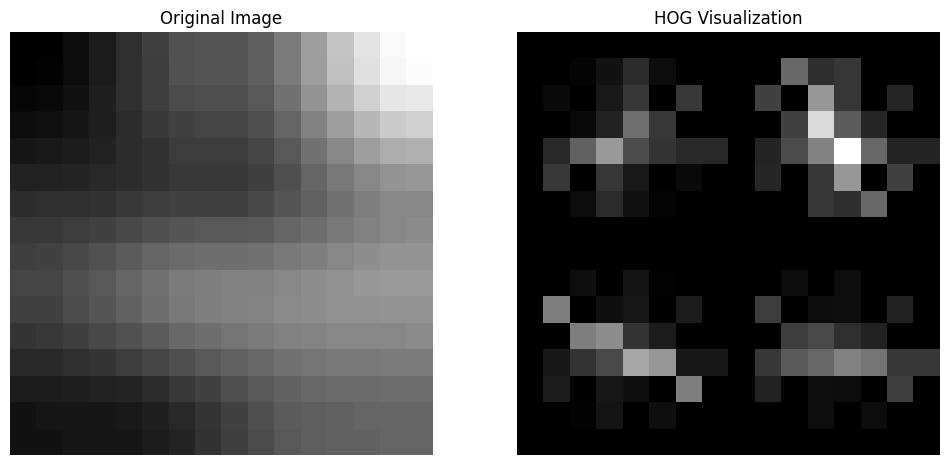

In [ ]:
def compute_gradient(image):
    """Tính gradient theo x và y sử dụng Sobel."""
    # Đảm bảo ảnh ở dạng float
    image = image.astype(float)

    # Tính gradient theo x và y
    gx = cv2.Sobel(image, cv2.CV_64F, 1, 0, ksize=3)
    gy = cv2.Sobel(image, cv2.CV_64F, 0, 1, ksize=3)

    # Tính magnitude và orientation của gradient
    magnitude = np.sqrt(gx**2 + gy**2)  # Đây là G (độ lớn gradient)
    orientation = np.arctan2(gy, gx) * 180 / np.pi # Đây là θ (hướng gradient)

    return gx, gy, magnitude, orientation

def create_histogram(magnitude, orientation, cell_size=8, num_bins=9):
    """Tạo histogram của các hướng gradient."""
    height, width = magnitude.shape

    # Tính số cells theo mỗi chiều
    cells_y = height // cell_size
    cells_x = width // cell_size

    # Khởi tạo histogram
    histogram = np.zeros((cells_y, cells_x, num_bins))

    # Góc của các bins
    bin_size = 180 // num_bins

    # Lặp qua từng cell
    for i in range(cells_y):
        for j in range(cells_x):
            # Lấy các giá trị trong cell hiện tại
            cell_magnitudes = magnitude[i*cell_size:(i+1)*cell_size,
                                     j*cell_size:(j+1)*cell_size]
            cell_orientations = orientation[i*cell_size:(i+1)*cell_size,
                                         j*cell_size:(j+1)*cell_size]

            # Tính histogram cho cell
            for y in range(cell_size):
                for x in range(cell_size):
                    orient = cell_orientations[y, x]
                    mag = cell_magnitudes[y, x]

                    # Đưa góc về khoảng 0-180
                    if orient < 0:
                        orient += 180

                    # Tính bin index
                    bin_index = int(orient // bin_size)
                    if bin_index >= num_bins:
                        bin_index = num_bins - 1

                    histogram[i, j, bin_index] += mag

    return histogram

def normalize_blocks(histogram, block_size=2):
    """Chuẩn hóa histogram theo blocks."""
    cells_y, cells_x, bins = histogram.shape
    blocks_y = cells_y - block_size + 1
    blocks_x = cells_x - block_size + 1

    normalized_blocks = []

    # Lặp qua các block
    for i in range(blocks_y):
        for j in range(blocks_x):
            # Lấy block hiện tại
            block = histogram[i:i+block_size, j:j+block_size, :]

            # Làm phẳng block thành vector
            block_vector = block.ravel()

            # Chuẩn hóa L2
            norm = np.sqrt(np.sum(block_vector**2) + 1e-6)
            normalized_blocks.append(block_vector / norm)

    return np.array(normalized_blocks)

# Hàm chính để tính HOG
def compute_hog_features(image, cell_size=8, block_size=2, num_bins=9):
    """Tính toán HOG features cho ảnh."""
    # Đảm bảo ảnh là grayscale
    if len(image.shape) > 2:
        image = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)

    # Tính gradient
    gx, gy, magnitude, orientation = compute_gradient(image)

    # Tạo histogram
    histogram = create_histogram(magnitude, orientation, cell_size, num_bins)

    # Chuẩn hóa blocks
    hog_features = normalize_blocks(histogram, block_size)

    return hog_features

# Code để vẽ HOG visualization
def plot_hog_visualization(image, cell_size=8, block_size=2, num_bins=9):
    """Vẽ visualization của HOG features."""
    # Tính HOG features sử dụng scikit-image
    features, hog_image = hog(image,
                            orientations=num_bins,
                            pixels_per_cell=(cell_size, cell_size),
                            cells_per_block=(block_size, block_size),
                            visualize=True)

    # Chuẩn hóa ảnh HOG để hiển thị
    hog_image_normalized = exposure.rescale_intensity(hog_image, in_range=(0, 10))

    # Hiển thị ảnh gốc và HOG
    fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 6))

    ax1.imshow(image, cmap='gray')
    ax1.set_title('Original Image')
    ax1.axis('off')

    ax2.imshow(hog_image_normalized, cmap='gray')
    ax2.set_title('HOG Visualization')
    ax2.axis('off')

    plt.show()

# Ví dụ sử dụng
if __name__ == "__main__":
    # Tạo ảnh mẫu 4x4
    sample_image = np.array([
        [10, 30, 40, 80],
        [20, 25, 30, 50],
        [30, 45, 50, 55],
        [15, 20, 35, 40]
    ], dtype=np.uint8)

    # Resize the image to at least 16x16
    resized_image = cv2.resize(sample_image, (16, 16), interpolation=cv2.INTER_CUBIC)

    # Tính và hiển thị HOG features
    hog_features = compute_hog_features(resized_image) # Use resized image here
    print("HOG features shape:", hog_features.shape)
    print("HOG features:", hog_features)

    # Vẽ visualization
    plot_hog_visualization(resized_image) # Use resized image here

Ví dụ

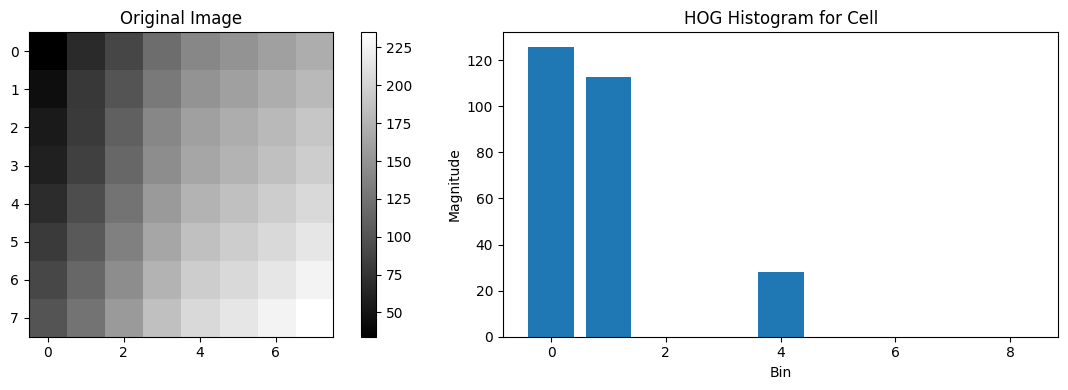

HOG Histogram values:
[125.8203125 112.5703125   0.          0.         28.          0.
   0.          0.          0.       ]


In [ ]:
import numpy as np
import cv2
import matplotlib.pyplot as plt
from skimage import feature
# Hàm tính gradient theo x và y sử dụng Sobel
def compute_gradient(image):
    # Kernel Sobel
    kernel_x = np.array([[-1, 0, 1], [-2, 0, 2], [-1, 0, 1]])
    kernel_y = np.array([[-1, -2, -1], [0, 0, 0], [1, 2, 1]])

    # Tính gradient
    gradient_x = cv2.filter2D(image, -1, kernel_x)
    gradient_y = cv2.filter2D(image, -1, kernel_y)

    return gradient_x, gradient_y

# Hàm tính magnitude và orientation của gradient
def compute_magnitude_orientation(gradient_x, gradient_y):
    # Tính magnitude
    magnitude = np.sqrt(gradient_x**2 + gradient_y**2)

    # Tính orientation (góc)
    orientation = np.arctan2(gradient_y, gradient_x) * 180 / np.pi
    # Chuyển về góc từ 0-180 độ
    orientation = np.mod(orientation + 180, 180)

    return magnitude, orientation

# Hàm tính histogram cho một cell
def compute_cell_histogram(magnitude, orientation, cell_size=8, num_bins=9):
    height, width = magnitude.shape
    histogram = np.zeros(num_bins)

    # Khoảng bin
    bin_size = 180 / num_bins

    for i in range(height):
        for j in range(width):
            # Tính bin index
            bin_index = int(orientation[i, j] // bin_size)
            if bin_index == num_bins:  # Trường hợp góc = 180
                bin_index = num_bins - 1

            # Cộng magnitude vào bin tương ứng
            histogram[bin_index] += magnitude[i, j]

    return histogram

# Hàm chính để tính HOG cho một ảnh
def compute_hog(image, cell_size=8, num_bins=9):
    # Chuyển sang ảnh xám nếu là ảnh màu
    if len(image.shape) == 3:
        image = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)

    # Tính gradient
    gradient_x, gradient_y = compute_gradient(image)
    magnitude, orientation = compute_magnitude_orientation(gradient_x, gradient_y)

    # Tính số cell theo chiều cao và rộng
    height, width = image.shape
    cells_y = height // cell_size
    cells_x = width // cell_size

    # Khởi tạo mảng lưu histogram cho mỗi cell
    hog_features = np.zeros((cells_y, cells_x, num_bins))

    # Tính histogram cho từng cell
    for i in range(cells_y):
        for j in range(cells_x):
            # Lấy vùng magnitude và orientation của cell hiện tại
            cell_magnitude = magnitude[i*cell_size:(i+1)*cell_size,
                                    j*cell_size:(j+1)*cell_size]
            cell_orientation = orientation[i*cell_size:(i+1)*cell_size,
                                        j*cell_size:(j+1)*cell_size]

            # Tính histogram cho cell
            hog_features[i, j] = compute_cell_histogram(cell_magnitude,
                                                      cell_orientation,
                                                      cell_size,
                                                      num_bins)

    return hog_features

# Test với ví d
# Tạo ảnh test 8x8
test_image = np.array([
    [34, 67, 89, 120, 140, 150, 160, 170],
    [45, 78, 100, 130, 150, 160, 170, 180],
    [55, 80, 110, 140, 160, 170, 180, 190],
    [60, 85, 115, 145, 165, 175, 185, 195],
    [70, 95, 125, 155, 175, 185, 195, 205],
    [80, 105, 135, 165, 185, 195, 205, 215],
    [90, 115, 145, 175, 195, 205, 215, 225],
    [100, 125, 155, 185, 205, 215, 225, 235]
], dtype=np.uint8)

# Tính HOG
hog_features = compute_hog(test_image)

# Vẽ histogram
plt.figure(figsize=(12, 4))

# Plot ảnh gốc
plt.subplot(121)
plt.imshow(test_image, cmap='gray')
plt.title('Original Image')
plt.colorbar()

# Plot histogram
plt.subplot(122)
plt.bar(range(9), hog_features[0, 0])
plt.title('HOG Histogram for Cell')
plt.xlabel('Bin')
plt.ylabel('Magnitude')

plt.tight_layout()
plt.show()

# In giá trị histogram
print("HOG Histogram values:")
print(hog_features[0, 0])

Workflow xử lý ảnh

Saving z5746799772339_964cdcb884041d98b12a1529faf5afd5.jpg to z5746799772339_964cdcb884041d98b12a1529faf5afd5.jpg
Processing z5746799772339_964cdcb884041d98b12a1529faf5afd5.jpg...
HOG features shape: (15645, 36)


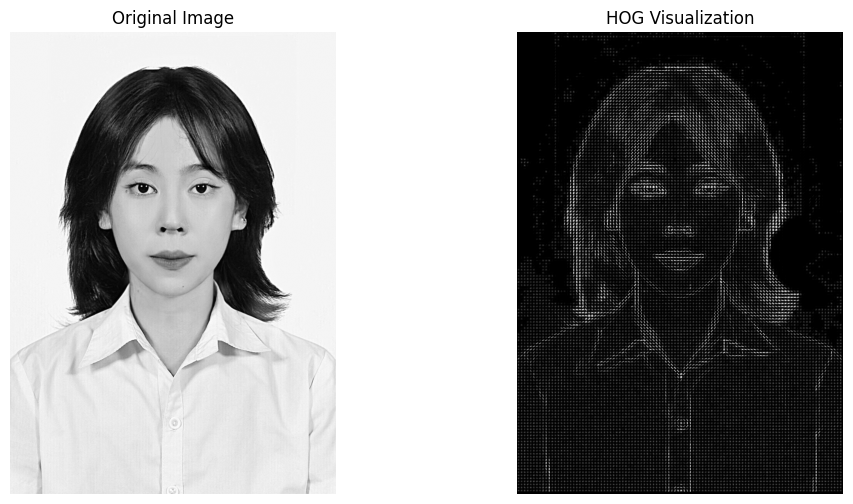

In [ ]:
from google.colab import files
import cv2

# Upload ảnh
uploaded = files.upload()

# Hàm để đọc và xử lý ảnh
def load_and_process_image(filename):
    # Đọc ảnh
    img = cv2.imread(filename, cv2.IMREAD_GRAYSCALE) # Đọc ảnh dưới dạng grayscale
    # You can add any necessary preprocessing here, e.g., resizing
    return img

# Xử lý ảnh đã upload
for filename in uploaded.keys():
    print(f'Processing {filename}...')

    # Đọc và xử lý ảnh
    img = load_and_process_image(filename)

    # Tính và hiển thị HOG
    hog_features = compute_hog_features(img)
    print(f"HOG features shape: {hog_features.shape}")

    # Vẽ visualization
    plot_hog_visualization(img)

# Logistic Regression


 **Cách thức thực thi**

**1. Tính toán hàm tuyến tính**

In [ ]:
import numpy as np

# X: Ma trận đặc trưng (bao gồm cột bias)
# beta: Trọng số ban đầu
def compute_linear(X, beta):
    return np.dot(X, beta)


**2. Chuyển đổi qua hàm sigmoid**

In [ ]:
def sigmoid(z):
    return 1 / (1 + np.exp(-z))


**3. Phân loại dựa trên xác suất**

In [ ]:
def classify(y_prob, threshold=0.5):
    return (y_prob >= threshold).astype(int)


**4. Tối ưu hóa tham số β bằng cách giảm thiểu hàm mất mát (Log-Loss)**

In [ ]:
def compute_loss(y_true, y_pred):
    m = len(y_true)
    loss = -np.mean(y_true * np.log(y_pred) + (1 - y_true) * np.log(1 - y_pred))
    return loss


**5. Sử dụng Gradient Descent để huấn luyện mô hình**

In [ ]:
def gradient_descent(X, y, beta, learning_rate, epochs):
    m = len(y)
    for epoch in range(epochs):
        # Tính toán dự đoán
        z = compute_linear(X, beta)
        y_pred = sigmoid(z)

        # Tính gradient
        gradient = np.dot(X.T, (y_pred - y)) / m

        # Cập nhật trọng số
        beta -= learning_rate * gradient

        # In thông tin (tùy chọn)
        if epoch % 100 == 0:
            loss = compute_loss(y, y_pred)
            print(f"Epoch {epoch}, Loss: {loss:.4f}")
    return beta


**6. Triển khai Logistic Regression hoàn chỉnh**

In [ ]:
# Khởi tạo dữ liệu
X = np.array([[1, 2], [1, 3], [1, 5]])  # Dữ liệu với cột bias
y = np.array([0, 0, 1])  # Nhãn
beta = np.zeros(X.shape[1])  # Khởi tạo trọng số

# Huấn luyện mô hình
learning_rate = 0.01
epochs = 1000
beta = gradient_descent(X, y, beta, learning_rate, epochs)

# Dự đoán
z = compute_linear(X, beta)
y_pred = sigmoid(z)
y_classified = classify(y_pred)
print("Dự đoán phân loại:", y_classified)


Epoch 0, Loss: 0.6931
Epoch 100, Loss: 0.6677
Epoch 200, Loss: 0.6438
Epoch 300, Loss: 0.6213
Epoch 400, Loss: 0.6001
Epoch 500, Loss: 0.5800
Epoch 600, Loss: 0.5610
Epoch 700, Loss: 0.5431
Epoch 800, Loss: 0.5261
Epoch 900, Loss: 0.5100
Dự đoán phân loại: [0 0 1]


Ví dụ giải tay

**Ví dụ với dữ liệu 1 chiều - Khai báo**

In [ ]:
# Hỗ trợ cả Python 2 và Python 3
from __future__ import division, print_function, unicode_literals
import numpy as np
import matplotlib.pyplot as plt
np.random.seed(2)

X = np.array([[0.50, 0.75, 1.00, 1.25, 1.50, 1.75, 1.75, 2.00, 2.25, 2.50,
              2.75, 3.00, 3.25, 3.50, 4.00, 4.25, 4.50, 4.75, 5.00, 5.50]])
y = np.array([0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1])

#Dữ liệu mở rộng
X = np.concatenate((np.ones((1, X.shape[1])), X), axis = 0)

**Các hàm cần thiết cho logistic sigmoid regression**

In [ ]:
def sigmoid(s):
    return 1/(1 + np.exp(-s))

def logistic_sigmoid_regression(X, y, w_init, eta, tol = 1e-4, max_count = 10000):
    w = [w_init]
    it = 0
    N = X.shape[1]
    d = X.shape[0]
    count = 0
    check_w_after = 20
    while count < max_count:
#         it += 1
        # mix data
        mix_id = np.random.permutation(N)
        for i in mix_id:
            xi = X[:, i].reshape(d, 1)
            yi = y[i]
            zi = sigmoid(np.dot(w[-1].T, xi))
            w_new = w[-1] + eta*(yi - zi)*xi
            count += 1
            # stopping criteria
            if count%check_w_after == 0:
                if np.linalg.norm(w_new - w[-check_w_after]) < tol:
                    return w
            w.append(w_new)
    return w
eta = .05
d = X.shape[0]
w_init = np.random.randn(d, 1)

w = logistic_sigmoid_regression(X, y, w_init, eta)
print(w[-1])

[[-4.092695  ]
 [ 1.55277242]]


**Với kết quả tìm được, đầu ra
 có thể được dự đoán theo công thức: y = sigmoid(-4.1 + 1.537*x). Với dữ liệu trong tập training, kết quả là:**

In [ ]:
print(sigmoid(np.dot(w[-1].T, X)))

[[0.03501592 0.05078108 0.07310642 0.10416972 0.14634799 0.20175793
  0.20175793 0.27147534 0.35458234 0.4475032  0.54424128 0.63775242
  0.72188183 0.79282004 0.89267823 0.92460236 0.94758783 0.96384008
  0.97518471 0.9884283 ]]



**Biểu diễn kết quả này trên đồ thị ta có:**

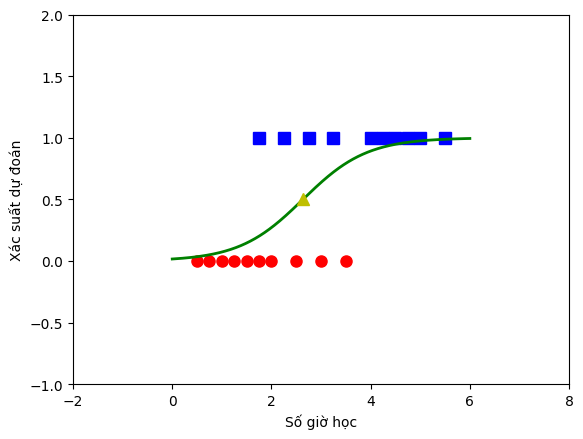

In [ ]:
X0 = X[1, np.where(y == 0)][0]
y0 = y[np.where(y == 0)]
X1 = X[1, np.where(y == 1)][0]
y1 = y[np.where(y == 1)]

plt.plot(X0, y0, 'ro', markersize = 8)
plt.plot(X1, y1, 'bs', markersize = 8)

xx = np.linspace(0, 6, 1000)
w0 = w[-1][0][0]
w1 = w[-1][1][0]
threshold = -w0/w1
yy = sigmoid(w0 + w1*xx)
plt.axis([-2, 8, -1, 2])
plt.plot(xx, yy, 'g-', linewidth = 2)
plt.plot(threshold, .5, 'y^', markersize = 8)
plt.xlabel('Số giờ học')
plt.ylabel('Xác suất dự đoán')
plt.savefig('lg_results.png', bbox_inches='tight', dpi = 300)
plt.show()

# Support Vector Machine (SVM)

Cách thức thực thi

Tìm nghiệm theo công thức

In [40]:
# Import các thư viện cần thiết
from __future__ import print_function  # Đảm bảo khả năng tương thích với Python 2 và 3
import numpy as np                     # Thư viện cho tính toán số học
import matplotlib.pyplot as plt        # Thư viện vẽ đồ thị
from scipy.spatial.distance import cdist  # Hàm tính khoảng cách giữa các điểm

# Thiết lập seed để có thể tái tạo lại kết quả ngẫu nhiên
np.random.seed(22)

# Định nghĩa tham số cho hai nhóm dữ liệu
means = [[2, 2], [4, 2]]  # Tọa độ trung tâm của hai nhóm: nhóm 1 tại (2,2), nhóm 2 tại (4,2)
cov = [[.3, .2], [.2, .3]]  # Ma trận hiệp phương sai để kiểm soát độ phân tán của dữ liệu
N = 10  # Số lượng điểm dữ liệu cho mỗi nhóm

# Tạo dữ liệu cho hai lớp sử dụng phân phối chuẩn đa biến
X0 = np.random.multivariate_normal(means[0], cov, N)  # Tạo N điểm cho lớp 1, tập trung quanh (2,2)
X1 = np.random.multivariate_normal(means[1], cov, N)  # Tạo N điểm cho lớp -1, tập trung quanh (4,2)

# Ghép dữ liệu từ hai lớp
X = np.concatenate((X0.T, X1.T), axis = 1)  # Ghép ma trận dữ liệu của cả hai lớp
# axis = 1 nghĩa là ghép theo chiều ngang

# Tạo nhãn cho dữ liệu
y = np.concatenate((np.ones((1, N)), -1*np.ones((1, N))), axis = 1)
# Tạo vector nhãn: N phần tử đầu là 1 (lớp 1), N phần tử sau là -1 (lớp -1)

In [36]:
from cvxopt import matrix, solvers
# Xây dựng ma trận K
V = np.concatenate((X0.T, -X1.T), axis = 1)
K = matrix(V.T.dot(V)) # xem định nghĩa của V, K
# Vector p là vector toàn số 1 âm
p = matrix(-np.ones((2*N, 1)))
# Xây dựng các ma trận ràng buộc A, b, G, h
G = matrix(-np.eye(2*N)) # để đảm bảo tất cả lambda_n >= 0
h = matrix(np.zeros((2*N, 1)))
A = matrix(y) # ràng buộc đẳng thức là y^T lambda = 0
b = matrix(np.zeros((1, 1)))
# Tắt hiển thị quá trình tối ưu
solvers.options['show_progress'] = False
# Giải bài toán quy hoạch bậc hai
sol = solvers.qp(K, p, G, h, A, b)
# Lấy kết quả lambda
l = np.array(sol['x'])
print('lambda = ')
print(l.T)

lambda = 
[[8.54018321e-01 2.89132533e-10 1.37095535e+00 6.36030818e-10
  4.04317408e-10 8.82390106e-10 6.35001881e-10 5.49567576e-10
  8.33359230e-10 1.20982928e-10 6.86678649e-10 1.25039745e-10
  2.22497367e+00 4.05417905e-09 1.26763684e-10 1.99008949e-10
  2.13742578e-10 1.51537487e-10 3.75329509e-10 3.56161975e-10]]


In [37]:
# epsilon là một số dương rất nhỏ, lớn hơn 1e-9
epsilon = 1e-6

# Tìm các chỉ số của các support vector (những điểm có lambda > epsilon)
S = np.where(l > epsilon)[0]

# Lấy ra các vector/ma trận tương ứng với support vector
VS = V[:, S]  # Ma trận V chỉ gồm các cột support vector
XS = X[:, S]  # Ma trận X chỉ gồm các cột support vector
yS = y[:, S]  # Vector y chỉ gồm các phần tử support vector
lS = l[S]     # Vector lambda chỉ gồm các phần tử support vector

# Tính vector trọng số w và hệ số điều chỉnh b
w = VS.dot(lS)  # Tính vector trọng số w
b = np.mean(yS.T - w.T.dot(XS))  # Tính hệ số điều chỉnh b

# In kết quả
print('w = ', w.T)
print('b = ', b)

w =  [[-2.00984381  0.64068336]]
b =  4.668560633868093


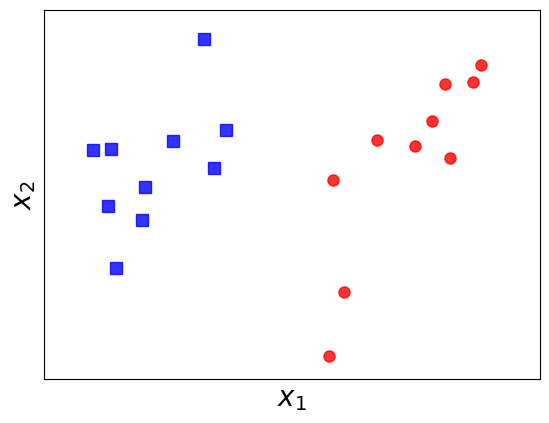

In [38]:
# Vẽ các điểm dữ liệu
# Vẽ điểm cho lớp 0 (hình vuông màu xanh)
plt.plot(X0[:, 0], X0[:, 1], 'bs', markersize = 8, alpha = .8)
# Vẽ điểm cho lớp 1 (hình tròn màu đỏ)
plt.plot(X1[:, 0], X1[:, 1], 'ro', markersize = 8, alpha = .8)

# Thiết lập tỷ lệ các trục bằng nhau để đồ thị không bị méo
plt.axis('equal')

# Thiết lập giới hạn các trục
plt.ylim(0, 3)    # Giới hạn trục y từ 0 đến 3
plt.xlim(2, 4)    # Giới hạn trục x từ 2 đến 4

# Ẩn các vạch chia trên trục
truc_hien_tai = plt.gca()  # Lấy trục hiện tại
truc_hien_tai.axes.get_xaxis().set_ticks([])  # Ẩn vạch chia trục x
truc_hien_tai.axes.get_yaxis().set_ticks([])  # Ẩn vạch chia trục y

# Đặt nhãn cho các trục với ký hiệu toán học
plt.xlabel('$x_1$', fontsize = 20)  # Nhãn trục x
plt.ylabel('$x_2$', fontsize = 20)  # Nhãn trục y

# Hiển thị đồ thị
plt.show()

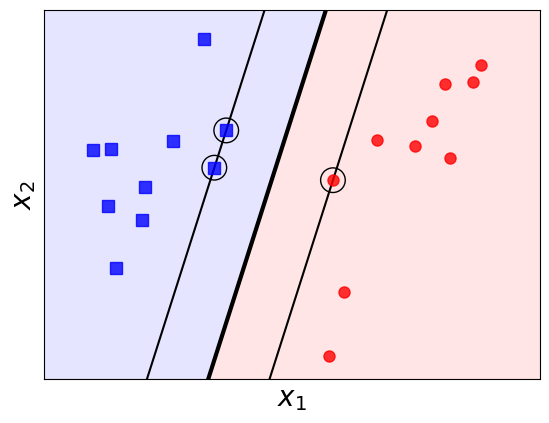

In [39]:
with PdfPages('svm4.pdf') as pdf:
    # Vẽ đồ thị
    # Tạo figure và axes
    fig, ax = plt.subplots()

    # Tạo dữ liệu cho trục x từ -10 đến 10, bước nhảy 0.1
    x1 = np.arange(-10, 10, 0.1)
    # Tính các đường phân cách
    y1 = -w[0, 0]/w[1, 0]*x1 - b/w[1, 0]      # Đường phân cách chính
    y2 = -w[0, 0]/w[1, 0]*x1 - (b-1)/w[1, 0]  # Đường biên dưới
    y3 = -w[0, 0]/w[1, 0]*x1 - (b+1)/w[1, 0]  # Đường biên trên

    # Vẽ các đường phân cách
    plt.plot(x1, y1, 'k', linewidth = 3)  # Đường chính đậm hơn
    plt.plot(x1, y2, 'k')                 # Đường biên dưới
    plt.plot(x1, y3, 'k')                 # Đường biên trên

    # Tạo đường giới hạn trên cho vùng tô màu
    y4 = 10*x1
    plt.plot(x1, y1, 'k')
    # Tô màu các vùng phân cách
    plt.fill_between(x1, y1, color='red', alpha=0.1)      # Vùng màu đỏ
    plt.fill_between(x1, y1, y4, color='blue', alpha=0.1) # Vùng màu xanh

    # Vẽ các điểm dữ liệu
    plt.plot(X0[:, 0], X0[:, 1], 'bs', markersize=8, alpha=0.8)  # Điểm lớp 0 màu xanh
    plt.plot(X1[:, 0], X1[:, 1], 'ro', markersize=8, alpha=0.8)  # Điểm lớp 1 màu đỏ

    # Thiết lập tỷ lệ các trục bằng nhau
    plt.axis('equal')
    # Giới hạn trục y từ 0 đến 3
    plt.ylim(0, 3)
    # Giới hạn trục x từ 2 đến 4
    plt.xlim(2, 4)

    # Ẩn các điểm đánh dấu trên trục
    cur_axes = plt.gca()
    cur_axes.axes.get_xaxis().set_ticks([])
    cur_axes.axes.get_yaxis().set_ticks([])

    # Thêm vòng tròn xung quanh các support vector
    for m in S:
        circle = plt.Circle((X[0, m], X[1, m]), 0.1, color='k', fill=False)
        ax.add_artist(circle)

    # Đặt nhãn cho các trục
    plt.xlabel('$x_1$', fontsize=20)
    plt.ylabel('$x_2$', fontsize=20)

    # Lưu đồ thị vào file PDF
    pdf.savefig()
    # Hiển thị đồ thị
    plt.show()